In [1]:
import pandas as pd

In [3]:
wta_df = pd.read_csv("csv/df_wta.csv")

C:\Users\acorsett\python_installation\envs\py3-TF2.0\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,12,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
wta_df.shape

(32053, 43)

# 2. Preprocessing

In [5]:
list(wta_df.columns)

['Unnamed: 0',
 'AvgL',
 'AvgW',
 'B365L',
 'B365W',
 'Best of',
 'CBL',
 'CBW',
 'Comment',
 'Court',
 'Date',
 'EXL',
 'EXW',
 'L1',
 'L2',
 'L3',
 'LBL',
 'LBW',
 'LPts',
 'LRank',
 'Location',
 'Loser',
 'Lsets',
 'MaxL',
 'MaxW',
 'PSL',
 'PSW',
 'Round',
 'SJL',
 'SJW',
 'Surface',
 'Tier',
 'Tournament',
 'UBL',
 'UBW',
 'W1',
 'W2',
 'W3',
 'WPts',
 'WRank',
 'WTA',
 'Winner',
 'Wsets']

In [8]:
df = wta_df.drop(['Unnamed: 0','WTA','Tournament', 'Location', 'Best of', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'Wsets', 
              'Lsets', 'Comment','CBW', 'CBL', 'EXW', 'EXL', 'WPts',
              'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL'], axis=1)

In [9]:
df.head()

,AvgL,AvgW,B365L,B365W,Court,Date,LRank,Loser,MaxL,MaxW,PSL,PSW,Round,Surface,Tier,WRank,Winner
0,NaN,NaN,3,1.33,Outdoor,2007-01-01,272.0,Baker L.,NaN,NaN,NaN,NaN,1st Round,Hard,Tier 4,81.0,Sun T.T.
1,NaN,NaN,1.22,3.75,Outdoor,2007-01-01,16.0,Myskina A.,NaN,NaN,1.244,4.700,1st Round,Hard,Tier 4,59.0,Dulko G.
2,NaN,NaN,2,1.72,Outdoor,2007-01-01,84.0,Birnerova E.,NaN,NaN,2.120,1.820,1st Round,Hard,Tier 4,56.0,Loit E.
3,NaN,NaN,1.83,1.83,Outdoor,2007-01-01,57.0,Nakamura A.,NaN,NaN,1.870,2.050,1st Round,Hard,Tier 4,70.0,Craybas J.
4,NaN,NaN,4.5,1.16,Outdoor,2007-01-01,180.0,Morita A.,NaN,NaN,5.900,1.185,1st Round,Hard,Tier 4,18.0,Bartoli M.


In [11]:
df.dtypes

AvgL       float64
AvgW       float64
B365L       object
B365W      float64
Court       object
Date        object
LRank      float64
Loser       object
MaxL       float64
MaxW       float64
PSL        float64
PSW        float64
Round       object
Surface     object
Tier        object
WRank      float64
Winner      object
dtype: object

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df["WRank"] = df["WRank"].astype('str')
df["LRank"] = df["LRank"].astype('str')

df["LRank"] = df["LRank"].str.replace("NR$","500",regex=True)
df["WRank"] = df["WRank"].str.replace("NR$","500",regex=True)
df["LRank"] = df["LRank"].str.replace("nan$","500",regex=True)
df["WRank"] = df["WRank"].str.replace("nan$","500",regex=True)
df["WRank"] = df["WRank"].str.replace("\\.0$","",regex=True)
df["LRank"] = df["LRank"].str.replace("\\.0$","",regex=True)

df['WRank'] = df['WRank'].astype('int')
df['LRank'] = df['LRank'].astype('int')

In [26]:
df["B365L"] = df["B365L"].astype("float64")

In [27]:
df.dtypes

AvgL              float64
AvgW              float64
B365L             float64
B365W             float64
Court              object
Date       datetime64[ns]
LRank               int32
Loser              object
MaxL              float64
MaxW              float64
PSL               float64
PSW               float64
Round              object
Surface            object
Tier               object
WRank               int32
Winner             object
dtype: object

In [28]:
df = df.rename({"Winner":"Player 0", "Loser":"Player 1", 
                "WRank":"Pl0_Rank", "LRank":"Pl1_Rank",
                "MaxW":"Max_Pl0", "MaxL":"Max_Pl1", "AvgW":"Avg_Pl0", "AvgL":"Avg_Pl1",
                "B365W":"B365_Pl0","B365L":"B365_Pl1","PSW":"PS_Pl0","PSL":"PS_Pl1"
               }, axis=1)

In [29]:
for ix, row in df.iterrows():
    if ix % 2 == 0: 
        #swap half of the records
        old_p0 = row['Player 0']
        old_p1 = row['Player 1']
        old_p0_rank = row['Pl0_Rank']
        old_p1_rank = row['Pl1_Rank']
        old_max_p0 = row['Max_Pl0']
        old_max_p1 = row['Max_Pl1']
        old_avg_p0 = row['Avg_Pl0']
        old_avg_p1 = row['Avg_Pl1']
        old_b365_p0 = row['B365_Pl0']
        old_b365_p1 = row['B365_Pl1']
        old_ps_p0 = row['PS_Pl0']
        old_ps_p1 = row['PS_Pl1']

        df.at[ix,'Player 0'] = old_p1
        df.at[ix,'Player 1'] = old_p0
        df.at[ix,'Pl0_Rank'] = old_p1_rank
        df.at[ix,'Pl1_Rank'] = old_p0_rank
        df.at[ix,'Max_Pl0'] = old_max_p1
        df.at[ix,'Max_Pl1'] = old_max_p0
        df.at[ix,'Avg_Pl0'] = old_avg_p1
        df.at[ix,'Avg_Pl1'] = old_avg_p0
        df.at[ix,'B365_Pl0'] = old_b365_p1
        df.at[ix,'B365_Pl1'] = old_b365_p0
        df.at[ix,'PS_Pl0'] = old_ps_p1
        df.at[ix,'PS_Pl1'] = old_ps_p0

        df.at[ix,'Won'] = 1
    else:
        #don't swap these records, but just mark as winner Player 0
        df.at[ix,'Won'] = 0

In [30]:
df.head()

,Avg_Pl1,Avg_Pl0,B365_Pl1,B365_Pl0,Court,Date,Pl1_Rank,Player 1,Max_Pl1,Max_Pl0,PS_Pl1,PS_Pl0,Round,Surface,Tier,Pl0_Rank,Player 0,Won
0,NaN,NaN,1.33,3.00,Outdoor,2007-01-01,81,Sun T.T.,NaN,NaN,NaN,NaN,1st Round,Hard,Tier 4,272,Baker L.,1.0
1,NaN,NaN,1.22,3.75,Outdoor,2007-01-01,16,Myskina A.,NaN,NaN,1.244,4.70,1st Round,Hard,Tier 4,59,Dulko G.,0.0
2,NaN,NaN,1.72,2.00,Outdoor,2007-01-01,56,Loit E.,NaN,NaN,1.820,2.12,1st Round,Hard,Tier 4,84,Birnerova E.,1.0
3,NaN,NaN,1.83,1.83,Outdoor,2007-01-01,57,Nakamura A.,NaN,NaN,1.870,2.05,1st Round,Hard,Tier 4,70,Craybas J.,0.0
4,NaN,NaN,1.16,4.50,Outdoor,2007-01-01,18,Bartoli M.,NaN,NaN,1.185,5.90,1st Round,Hard,Tier 4,180,Morita A.,1.0


In [35]:
df['Tier'].unique()
##T3 e T4 : International
##T2: Premier

array(['Tier 4', 'Tier 3', 'Tier 2', 'Grand Slam', 'Tier 1',
       'Tour Championships', 'International', 'Premier', 'SEC',
       'Elite Trophy'], dtype=object)

In [51]:
df['Tier'] = df['Tier'].str.replace('Tier 3$','International', regex=True)
df['Tier'] = df['Tier'].str.replace('Tier 4$','International', regex=True)
df['Tier'] = df['Tier'].str.replace('Tier 2$','Premier', regex=True)
df['Tier'] = df['Tier'].str.replace('Tier 1$','Premier', regex=True)
df['Tier'] = df['Tier'].str.replace('SEC$','Tour Championships', regex=True)
df['Tier'] = df['Tier'].str.replace('Elite Trophy$','Tour Championships', regex=True)

In [52]:
df['Tier'].unique()

array(['International', 'Premier', 'Grand Slam', 'Tour Championships'],
      dtype=object)

In [53]:
court_dummies = pd.get_dummies(df['Court'])
surface_dummies = pd.get_dummies(df['Surface'])
round_dummies = pd.get_dummies(df['Round'])
tier_dummies = pd.get_dummies(df['Tier'])
df = pd.concat([df, court_dummies, surface_dummies, tier_dummies, round_dummies], axis=1)

In [54]:
df.head()

,Avg_Pl1,Avg_Pl0,B365_Pl1,B365_Pl0,Court,Date,Pl1_Rank,Player 1,Max_Pl1,Max_Pl0,...,Tour Championships,1st Round,2nd Round,3rd Round,4th Round,Quarterfinals,Round Robin,Semifinals,The Final,Third Place
0,NaN,NaN,1.33,3.00,Outdoor,2007-01-01,81,Sun T.T.,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,NaN,NaN,1.22,3.75,Outdoor,2007-01-01,16,Myskina A.,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,NaN,NaN,1.72,2.00,Outdoor,2007-01-01,56,Loit E.,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
3,NaN,NaN,1.83,1.83,Outdoor,2007-01-01,57,Nakamura A.,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
4,NaN,NaN,1.16,4.50,Outdoor,2007-01-01,18,Bartoli M.,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0


In [55]:
df.drop(['Court', 'Surface', 'Round', 'Tier'], axis=1, inplace = True)

In [56]:
df.to_csv("csv/Preprocessed_Data.csv", index=False)

# Calculate New Features

In [57]:
df = pd.read_csv("csv/Preprocessed_Data.csv")

In [59]:
df.columns

Index(['Avg_Pl1', 'Avg_Pl0', 'B365_Pl1', 'B365_Pl0', 'Date', 'Pl1_Rank',
       'Player 1', 'Max_Pl1', 'Max_Pl0', 'PS_Pl1', 'PS_Pl0', 'Pl0_Rank',
       'Player 0', 'Won', 'Indoor', 'Outdoor', 'Carpet', 'Clay', 'Grass',
       'Greenset', 'Hard', 'Grand Slam', 'International', 'Premier',
       'Tour Championships', '1st Round', '2nd Round', '3rd Round',
       '4th Round', 'Quarterfinals', 'Round Robin', 'Semifinals', 'The Final',
       'Third Place'],
      dtype='object')

In [58]:
"""
ranking_comparator_index function takes in input the ranks of players 0 and 1 (i.e.: 3, 19) and returns a value between -1 and 1.
The value is negative, if player1 has a higher ranking than player0. It's positive if player0 has a higher ranking than 
player1, and it's close to 0 if the players have similar rankings.
Similarity between rankings is not only expressed by the distance between the rankings. 
In fact, between number 1 and number 2, there is a higher difference than number 59 and number 60.
This metric is taken into account while calculating the ranking comparator index.
"""
def ranking_comparator_index(player_0_rank, player_1_rank):
    tmp0 = 1/player_0_rank
    tmp1 = 1/player_1_rank
    
    max_tmp = max(tmp0,tmp1)
    coeff = ( abs(tmp0-tmp1) / max_tmp)**2
    
    proportion = coeff * max_tmp / (tmp0 + tmp1)
    proportion = round(proportion,4)
    if player_0_rank < player_1_rank:
        return proportion
    else:
        return proportion * -1

In [60]:
surface_performance_list = []

#list all players in the dataset
players = set(df['Player 0']) | set(df['Player 1'])

surfaces = ['Hard','Grass','Clay','Carpet', 'Greenset']
for player in players:
    for surface in surfaces:
        player_df = df[(df["Player 0"]==player) | (df["Player 1"]==player)]

        total_played = player_df[ (player_df[surface] == 1) ].shape[0]
        
        total_won = player_df[(player_df[surface] == 1) & \
                        ( ( (player_df["Player 0"]==player) & (player_df["Won"]==0) ) | (( (player_df["Player 1"]==player) & (player_df["Won"]==1) )) ) ].shape[0]
        
        if total_played == 0: performance_index = 0
        else: performance_index = round(float(total_won/total_played), 2)
        surface_performance_list.append({"Player":player,"Surface":surface,"Performance":performance_index})

surface_perf_df = pd.DataFrame(surface_performance_list)

In [61]:
surface_perf_df[surface_perf_df['Player'] == "Williams S."]

,Player,Surface,Performance
2045,Williams S.,Hard,0.85
2046,Williams S.,Grass,0.89
2047,Williams S.,Clay,0.82
2048,Williams S.,Carpet,0.75
2049,Williams S.,Greenset,0.00


In [62]:
surface_perf_df[surface_perf_df['Player'] == "Williams V."]

,Player,Surface,Performance
3025,Williams V.,Hard,0.72
3026,Williams V.,Grass,0.80
3027,Williams V.,Clay,0.66
3028,Williams V.,Carpet,0.00
3029,Williams V.,Greenset,0.00


In [63]:
surface_perf_df[surface_perf_df['Player'] == "Ivanovic A."]

,Player,Surface,Performance
3395,Ivanovic A.,Hard,0.66
3396,Ivanovic A.,Grass,0.64
3397,Ivanovic A.,Clay,0.69
3398,Ivanovic A.,Carpet,0.67
3399,Ivanovic A.,Greenset,0.00


In [64]:
surface_perf_df[surface_perf_df['Player'] == "Azarenka V."]

,Player,Surface,Performance
2990,Azarenka V.,Hard,0.74
2991,Azarenka V.,Grass,0.66
2992,Azarenka V.,Clay,0.67
2993,Azarenka V.,Carpet,0.40
2994,Azarenka V.,Greenset,0.00


In [65]:
"""
This method takes in input a dataframe containing all the matches, a player, a date D and a tuple of integers, 
where the minimum number represents the number of matches to consider to calculate the recent form and the max number 
represents the number of matches to consider to calculate the form of the player.
"""
def form_performance_index(df, player, date, matches_to_consider_tuple):
    try:
        recent_form_matches = min(matches_to_consider_tuple)
        form_matches = max(matches_to_consider_tuple)
    except:
        raise ValueError("Wrong value for argument matches_to_consider_tuple. It has to be a tuple of integers.")
    
    player_df = df[(df['Player 0']==player) | (df['Player 1']==player)]
    
    #Form DF
    last_matches_before_date_df_form = player_df[player_df['Date'] < date]       \
                                            .sort_values('Date', ascending=False).head(form_matches)
    
    #Recent Form DF
    last_matches_before_date_df_recent_form = last_matches_before_date_df_form.head(recent_form_matches)
    
    #Form
    total_played_form = last_matches_before_date_df_form.shape[0]
    total_won_form = last_matches_before_date_df_form[( ( \
                (last_matches_before_date_df_form["Player 0"]==player) & (last_matches_before_date_df_form["Won"]==0) ) | \
                (( (last_matches_before_date_df_form["Player 1"]==player) & (last_matches_before_date_df_form["Won"]==1) )) )].shape[0]
        
    if total_played_form == 0: performance_index_form = 0
    else: performance_index_form = round(float(total_won_form/total_played_form), 2)
    
    
    #Recent Form
    total_played_recent_form = last_matches_before_date_df_recent_form.shape[0]
    total_won_recent_form = last_matches_before_date_df_recent_form[( ( \
                (last_matches_before_date_df_recent_form["Player 0"]==player) & (last_matches_before_date_df_recent_form["Won"]==0) ) | \
                (( (last_matches_before_date_df_recent_form["Player 1"]==player) & (last_matches_before_date_df_recent_form["Won"]==1) )) )].shape[0]
        
    if total_played_recent_form == 0: performance_index_recent_form = 0
    else: performance_index_recent_form = round(float(total_won_recent_form/total_played_recent_form), 2)   
    
    return performance_index_form, performance_index_recent_form

In [66]:
def performance_against_opponent_ranking_index(df, player, range_tuple):
    try:
        range_min = range_tuple[0]
        range_max = range_tuple[1]
    except:
        raise ValueError("Opponent Ranking Range tuple not provided correctly: " + range_tuple)
        
    if range_min > range_max:
        tmp = range_min
        range_min = range_max
        range_max = tmp
    
    player_won_as_pl0 = df[(df["Player 0"]==player) & (df["Won"]==0) & (df['Pl1_Rank'] <= range_max) & (df['Pl1_Rank'] >= range_min)]
    player_won_as_pl1 = df[(df["Player 1"]==player) & (df["Won"]==1) & (df['Pl0_Rank'] <= range_max) & (df['Pl0_Rank'] >= range_min)]
    
    player_lost_as_pl0 = df[(df["Player 0"]==player) & (df["Won"]==1) & (df['Pl1_Rank'] <= range_max) & (df['Pl1_Rank'] >= range_min)]
    player_lost_as_pl1 = df[(df["Player 1"]==player) & (df["Won"]==0) & (df['Pl0_Rank'] <= range_max) & (df['Pl0_Rank'] >= range_min)]
    
    
    won = player_won_as_pl0.shape[0] + player_won_as_pl1.shape[0]
    lost = player_lost_as_pl0.shape[0] + player_lost_as_pl1.shape[0]
    
    if won + lost == 0: return 0
    return round(float(won/(won+lost)), 2)

In [67]:
def create_performance_vs_opponents_dataframe(df):
    perf_df_list = []
    
    players = set(df["Player 0"]) | set(df["Player 1"])
    bins = [(1,4), (5,10), (11,20), (21,50), (51,100), (101,250), (251, 10000)]
    for player in players:
        player_df = df[(df["Player 0"] == player) | (df["Player 1"] == player)]
        for b in bins:
            performance = performance_against_opponent_ranking_index(player_df, player, b)
            perf_df_list.append({"Player":player, "Min Bin":b[0], "Max Bin":b[1], "Performance":performance})
    
    return pd.DataFrame(perf_df_list)

In [68]:
performance_opponents_dataframe = create_performance_vs_opponents_dataframe(df)

In [69]:
def __get_bin__(ranking):
    bins = [(1,4), (5,10), (11,20), (21,50), (51,100), (101,250), (251, 10000)]
        
    for b in bins:
        b_min = b[0]
        b_max = b[1]
        if ranking >= b_min and ranking <= b_max:
            return b
    
    return bins[-1]

In [70]:
def _get_surface_by_row__(row):
    if row['Hard'] == 1: return "Hard"
    if row['Clay'] == 1: return "Clay"
    if row['Grass'] == 1: return "Grass"
    if row['Carpet'] == 1: return "Carpet"
    if row['Greenset'] == 1: return "Greenset"
    return ""

In [71]:
def calculate_new_features(df):
    
    performance_df_absent = False
    try:
        form_performance_df = pd.read_csv("csv/Form_Performance.csv")
    except:
        print("Warn: file 'csv/Form_Performance.csv' not found. Creating it now...")
        performance_df_absent = True
        form_performance_df_list = []
    
    for ix, row in df.iterrows():

        if ix % 5000 == 0: print('{} matches computed on total {}'.format(ix, df.shape[0]))
        
        pl0 = row["Player 0"]
        pl1 = row["Player 1"]

        rank_index = ranking_comparator_index(row['Pl0_Rank'], row['Pl1_Rank'])
        
        if performance_df_absent:
            pl0_form_index_last20, pl0_form_index_last7 = form_performance_index(df, pl0, row['Date'], (20,7))
            pl1_form_index_last20, pl1_form_index_last7 = form_performance_index(df, pl1, row['Date'], (20,7))
            form_performance_df_list.append(
                {"Date":row['Date'],"Pl0":row['Player 0'],"Pl1":row['Player 1'], "Pl0_last_7":pl0_form_index_last7,
                "Pl0_last_20":pl0_form_index_last20,"Pl1_last_7":pl1_form_index_last7,"Pl1_last_20":pl1_form_index_last20}
            )
        else:
            match_row = form_performance_df[(form_performance_df['Date']==row['Date']) & (form_performance_df['Pl0']==pl0) & (form_performance_df['Pl1']==pl1)].iloc[0]
            pl0_form_index_last20 = match_row['Pl0_last_20']
            pl1_form_index_last20 = match_row['Pl1_last_20']
            pl0_form_index_last7 = match_row['Pl0_last_7']
            pl1_form_index_last7 = match_row['Pl1_last_7']

        p0_bin = __get_bin__(row['Pl0_Rank'])
        p1_bin = __get_bin__(row['Pl1_Rank'])
        
        pl0_against_opponent_bin = performance_opponents_dataframe[
            (performance_opponents_dataframe["Player"]==pl0) & (performance_opponents_dataframe["Min Bin"]==p1_bin[0]) 
            & (performance_opponents_dataframe["Max Bin"]==p1_bin[1])].iloc[0,3]
        
        pl1_against_opponent_bin = performance_opponents_dataframe[
            (performance_opponents_dataframe["Player"]==pl1) & (performance_opponents_dataframe["Min Bin"]==p0_bin[0]) 
            & (performance_opponents_dataframe["Max Bin"]==p0_bin[1])].iloc[0,3]

        surface = _get_surface_by_row__(row)

        df.at[ix, 'Rank Index'] = rank_index
        df.at[ix, 'Pl0 Recent Form'] = pl0_form_index_last7
        df.at[ix, 'Pl0 Form'] = pl0_form_index_last20
        df.at[ix, 'Pl1 Recent Form']= pl1_form_index_last7
        df.at[ix, 'Pl1 Form'] = pl1_form_index_last20
        df.at[ix, 'Pl0 Perf. vs Similar Opponent'] = pl0_against_opponent_bin
        df.at[ix, 'Pl1 Perf. vs Similar Opponent'] = pl1_against_opponent_bin
        df.at[ix, 'Pl0 Surface Performance'] = surface_perf_df[(surface_perf_df["Player"] == pl0) & (surface_perf_df["Surface"] == surface)].iloc[0]['Performance']
        df.at[ix, 'Pl1 Surface Performance'] = surface_perf_df[(surface_perf_df["Player"] == pl1) & (surface_perf_df["Surface"] == surface)].iloc[0]['Performance']

    if performance_df_absent:
        form_performance_df = pd.DataFrame(form_performance_df_list)
        form_performance_df.to_csv("csv/Form_Performance.csv", index=False)
    

In [72]:
import time
start_time = time.time()
calculate_new_features(df)
print("--- %s seconds ---" % (time.time() - start_time))

Warn: file 'csv/Form_Performance.csv' not found. Creating it now...
0 matches computed on total 32053
5000 matches computed on total 32053
10000 matches computed on total 32053
15000 matches computed on total 32053
20000 matches computed on total 32053
25000 matches computed on total 32053
30000 matches computed on total 32053
--- 855.8023252487183 seconds ---


In [73]:
list(df.columns)

['Avg_Pl1',
 'Avg_Pl0',
 'B365_Pl1',
 'B365_Pl0',
 'Date',
 'Pl1_Rank',
 'Player 1',
 'Max_Pl1',
 'Max_Pl0',
 'PS_Pl1',
 'PS_Pl0',
 'Pl0_Rank',
 'Player 0',
 'Won',
 'Indoor',
 'Outdoor',
 'Carpet',
 'Clay',
 'Grass',
 'Greenset',
 'Hard',
 'Grand Slam',
 'International',
 'Premier',
 'Tour Championships',
 '1st Round',
 '2nd Round',
 '3rd Round',
 '4th Round',
 'Quarterfinals',
 'Round Robin',
 'Semifinals',
 'The Final',
 'Third Place',
 'Rank Index',
 'Pl0 Recent Form',
 'Pl0 Form',
 'Pl1 Recent Form',
 'Pl1 Form',
 'Pl0 Perf. vs Similar Opponent',
 'Pl1 Perf. vs Similar Opponent',
 'Pl0 Surface Performance',
 'Pl1 Surface Performance']

In [74]:
df = df[['Date', 'Player 0', 'Player 1', 'Won', 'Pl0_Rank', 'Pl1_Rank', 'Avg_Pl0', 'Avg_Pl1', 'Max_Pl1', 'Max_Pl0', 
         'PS_Pl0', 'PS_Pl1', 'B365_Pl0', 'B365_Pl1', 'Indoor', 'Outdoor', 'Carpet', 'Clay', 'Grass', 'Greenset', 'Hard', 'International', 'Premier', 
                     'Grand Slam', 'Tour Championships', '1st Round', '2nd Round', '3rd Round', '4th Round', 
                     'Quarterfinals', 'Round Robin', 'Semifinals', 'Third Place', 'The Final', 'Rank Index', 'Pl0 Recent Form', 'Pl0 Form', 
                     'Pl1 Recent Form', 'Pl1 Form', 'Pl0 Perf. vs Similar Opponent', 'Pl1 Perf. vs Similar Opponent', 
                     'Pl0 Surface Performance', 'Pl1 Surface Performance']]

In [75]:
df.to_csv("csv/FeatureCalculated_Data.csv", index=False)

# 4. Modeling

In [76]:
df = pd.read_csv("csv/FeatureCalculated_Data.csv")

In [77]:
df.shape

(32053, 43)

In [80]:
nobets_df = df.copy()
nobets_df.head()

,Date,Player 0,Player 1,Won,Pl0_Rank,Pl1_Rank,Avg_Pl0,Avg_Pl1,Max_Pl1,Max_Pl0,...,The Final,Rank Index,Pl0 Recent Form,Pl0 Form,Pl1 Recent Form,Pl1 Form,Pl0 Perf. vs Similar Opponent,Pl1 Perf. vs Similar Opponent,Pl0 Surface Performance,Pl1 Surface Performance
0,2007-01-01,Baker L.,Sun T.T.,1.0,272,81,NaN,NaN,NaN,NaN,...,0,-0.3799,0.0,0.0,0.0,0.0,0.00,1.00,0.00,0.18
1,2007-01-01,Dulko G.,Myskina A.,0.0,59,16,NaN,NaN,NaN,NaN,...,0,-0.4179,0.0,0.0,0.0,0.0,0.33,0.00,0.45,0.00
2,2007-01-01,Birnerova E.,Loit E.,1.0,84,56,NaN,NaN,NaN,NaN,...,0,-0.0667,0.0,0.0,0.0,0.0,0.33,0.46,0.40,0.37
3,2007-01-01,Craybas J.,Nakamura A.,0.0,70,57,NaN,NaN,NaN,NaN,...,0,-0.0190,0.0,0.0,0.0,0.0,0.39,0.32,0.37,0.29
4,2007-01-01,Morita A.,Bartoli M.,1.0,180,18,NaN,NaN,NaN,NaN,...,0,-0.7364,0.0,0.0,0.0,0.0,0.25,0.79,0.40,0.63


In [82]:
nobets_df.columns

Index(['Date', 'Player 0', 'Player 1', 'Won', 'Pl0_Rank', 'Pl1_Rank',
       'Avg_Pl0', 'Avg_Pl1', 'Max_Pl1', 'Max_Pl0', 'PS_Pl0', 'PS_Pl1',
       'B365_Pl0', 'B365_Pl1', 'Indoor', 'Outdoor', 'Carpet', 'Clay', 'Grass',
       'Greenset', 'Hard', 'International', 'Premier', 'Grand Slam',
       'Tour Championships', '1st Round', '2nd Round', '3rd Round',
       '4th Round', 'Quarterfinals', 'Round Robin', 'Semifinals',
       'Third Place', 'The Final', 'Rank Index', 'Pl0 Recent Form', 'Pl0 Form',
       'Pl1 Recent Form', 'Pl1 Form', 'Pl0 Perf. vs Similar Opponent',
       'Pl1 Perf. vs Similar Opponent', 'Pl0 Surface Performance',
       'Pl1 Surface Performance'],
      dtype='object')

In [83]:
inputs = nobets_df.iloc[:, 14:]
targets = nobets_df.iloc[:, 3]

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25, shuffle=False)

In [223]:
x_train

,Indoor,Outdoor,Carpet,Clay,Grass,Greenset,Hard,International,Premier,Grand Slam,...,The Final,Rank Index,Pl0 Recent Form,Pl0 Form,Pl1 Recent Form,Pl1 Form,Pl0 Perf. vs Similar Opponent,Pl1 Perf. vs Similar Opponent,Pl0 Surface Performance,Pl1 Surface Performance
0,0,1,0,0,0,0,1,1,0,0,...,0,-0.3799,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.18
1,0,1,0,0,0,0,1,1,0,0,...,0,-0.4179,0.00,0.00,0.00,0.00,0.33,0.00,0.45,0.00
2,0,1,0,0,0,0,1,1,0,0,...,0,-0.0667,0.00,0.00,0.00,0.00,0.33,0.46,0.40,0.37
3,0,1,0,0,0,0,1,1,0,0,...,0,-0.0190,0.00,0.00,0.00,0.00,0.39,0.32,0.37,0.29
4,0,1,0,0,0,0,1,1,0,0,...,0,-0.7364,0.00,0.00,0.00,0.00,0.25,0.79,0.40,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24034,0,1,0,0,0,0,1,0,0,1,...,0,-0.0367,0.43,0.55,0.29,0.45,0.59,0.59,0.52,0.41
24035,0,1,0,0,0,0,1,0,0,1,...,0,-0.2988,0.43,0.45,0.57,0.70,0.44,0.61,0.50,0.55
24036,0,1,0,0,0,0,1,0,0,1,...,0,-0.5836,0.43,0.25,0.57,0.55,0.00,0.75,0.35,0.66
24037,0,1,0,0,0,0,1,0,0,1,...,0,-0.6620,0.00,0.00,0.43,0.45,0.67,0.71,0.36,0.40


In [225]:
nobets_df.iloc[:24038,:]

,Date,Player 0,Player 1,Won,Pl0_Rank,Pl1_Rank,Avg_Pl0,Avg_Pl1,Max_Pl1,Max_Pl0,...,The Final,Rank Index,Pl0 Recent Form,Pl0 Form,Pl1 Recent Form,Pl1 Form,Pl0 Perf. vs Similar Opponent,Pl1 Perf. vs Similar Opponent,Pl0 Surface Performance,Pl1 Surface Performance
0,2007-01-01,Baker L.,Sun T.T.,1.0,272,81,NaN,NaN,NaN,NaN,...,0,-0.3799,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.18
1,2007-01-01,Dulko G.,Myskina A.,0.0,59,16,NaN,NaN,NaN,NaN,...,0,-0.4179,0.00,0.00,0.00,0.00,0.33,0.00,0.45,0.00
2,2007-01-01,Birnerova E.,Loit E.,1.0,84,56,NaN,NaN,NaN,NaN,...,0,-0.0667,0.00,0.00,0.00,0.00,0.33,0.46,0.40,0.37
3,2007-01-01,Craybas J.,Nakamura A.,0.0,70,57,NaN,NaN,NaN,NaN,...,0,-0.0190,0.00,0.00,0.00,0.00,0.39,0.32,0.37,0.29
4,2007-01-01,Morita A.,Bartoli M.,1.0,180,18,NaN,NaN,NaN,NaN,...,0,-0.7364,0.00,0.00,0.00,0.00,0.25,0.79,0.40,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24033,2016-08-29,Davis L.,Sasnovich A.,0.0,105,107,1.63,2.24,2.30,1.70,...,0,0.0002,0.57,0.40,0.29,0.35,0.71,0.58,0.48,0.50
24034,2016-08-29,Hsieh S.W.,Bondarenko K.,1.0,79,59,3.08,1.36,1.41,3.25,...,0,-0.0367,0.43,0.55,0.29,0.45,0.59,0.59,0.52,0.41
24035,2016-08-29,Niculescu M.,Strycova B.,0.0,58,21,3.40,1.31,1.35,3.55,...,0,-0.2988,0.43,0.45,0.57,0.70,0.44,0.61,0.50,0.55
24036,2016-08-30,Minella M.,Svitolina E.,1.0,110,19,6.84,1.10,1.12,8.36,...,0,-0.5836,0.43,0.25,0.57,0.55,0.00,0.75,0.35,0.66


In [85]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(max_iter=10000, verbose=2)
lreg.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [86]:
score = lreg.score(x_test, y_test)
print(score)

0.701896680808585


In [87]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [88]:
targets_for_nn = pd.DataFrame()
for items in targets.iteritems():
    ix = items[0]
    winner = items[1]
    if winner == 0:
        targets_for_nn.at[ix, 'Player 0'] = 1
        targets_for_nn.at[ix, 'Player 1'] = 0
    else:
        targets_for_nn.at[ix, 'Player 0'] = 0
        targets_for_nn.at[ix, 'Player 1'] = 1

In [89]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets_for_nn, test_size=0.25, shuffle=False)

In [90]:
input_cols = inputs.shape[1]

# define the keras model
model = Sequential()
model.add(Dense(1000, input_dim=input_cols, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [91]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
model.fit(x_train, y_train, epochs=10, batch_size=150)

Epoch 1/10
24039/24039 [==============================] - 4s 181us/step - loss: 0.6229 - accuracy: 0.67390s - loss: 0.6239 - accuracy
Epoch 2/10
24039/24039 [==============================] - 4s 179us/step - loss: 0.5950 - accuracy: 0.6983
Epoch 3/10
24039/24039 [==============================] - 4s 176us/step - loss: 0.5812 - accuracy: 0.7019
Epoch 4/10
24039/24039 [==============================] - 4s 181us/step - loss: 0.5719 - accuracy: 0.7060
Epoch 5/10
24039/24039 [==============================] - 4s 179us/step - loss: 0.5652 - accuracy: 0.7061
Epoch 6/10
24039/24039 [==============================] - 4s 184us/step - loss: 0.5603 - accuracy: 0.7080
Epoch 7/10
24039/24039 [==============================] - 4s 187us/step - loss: 0.5578 - accuracy: 0.70670s - loss: 0.557
Epoch 8/10
24039/24039 [==============================] - 5s 224us/step - loss: 0.5585 - accuracy: 0.70591s -
Epoch 9/10
24039/24039 [==============================] - 5s 191us/step - loss: 0.5529 - accuracy: 0.706

In [93]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

8014/8014 [==============================] - 1s 140us/step
Test accuracy: 0.6839281320571899


In [94]:
import pickle

In [95]:
filename = 'logistic_regression.lr'
pickle.dump(lreg, open(filename, 'wb'))

In [96]:
cols = list(inputs.columns)
coefs = lreg.coef_.tolist()[0]

coef_df_list = []
for i in range(0,inputs.shape[1]):
    col = cols[i]
    coef = coefs[i]
    coef_df_list.append({"Column":col,"Coef":coef})

coef_df = pd.DataFrame(coef_df_list)

In [97]:
coef_df.to_csv("csv/Coefficients.csv", index=False)

# 5. Value bet generator

In [98]:
model = pickle.load(open("logistic_regression.lr", 'rb'))

In [99]:
coefs_df = pd.read_csv("csv/Coefficients.csv")
coefs_map = {}
for ix, row in coefs_df.iterrows():

    attribute = row['Column']
    attribute_coef = row['Coef']

    coefs_map[attribute] = attribute_coef
    
coefs_df[abs(coefs_df['Coef']) > 0.1].sort_values('Coef', ascending = False)

,Column,Coef
26,Pl1 Perf. vs Similar Opponent,2.808015
28,Pl1 Surface Performance,2.523192
18,Third Place,0.788571
22,Pl0 Form,0.664312
20,Rank Index,0.553073
23,Pl1 Recent Form,0.403786
5,Greenset,0.223550
10,Tour Championships,0.158756
11,1st Round,-0.118266
12,2nd Round,-0.121691


In [100]:
df = pd.read_csv("csv/FeatureCalculated_Data.csv")

In [101]:
betting_data_df = df[(df["Avg_Pl0"] > 1) & (df["Avg_Pl1"] > 1)].copy()

In [102]:
inputs = betting_data_df.iloc[:, 14:]

In [103]:
predicted_outputs = model.predict_proba(inputs)

In [104]:
index = 0
for ix, row in betting_data_df.iterrows():
    prob_pl0 = predicted_outputs[index][0] 
    prob_pl1 = predicted_outputs[index][1] 
    betting_data_df.loc[ix, 'Pl0 %'] = prob_pl0
    betting_data_df.loc[ix, 'Pl1 %'] = prob_pl1
    index += 1

In [105]:
betting_data_df.head()

,Date,Player 0,Player 1,Won,Pl0_Rank,Pl1_Rank,Avg_Pl0,Avg_Pl1,Max_Pl1,Max_Pl0,...,Pl0 Recent Form,Pl0 Form,Pl1 Recent Form,Pl1 Form,Pl0 Perf. vs Similar Opponent,Pl1 Perf. vs Similar Opponent,Pl0 Surface Performance,Pl1 Surface Performance,Pl0 %,Pl1 %
8185,2010-04-26,Savchuk O.,Mayr P.,0.0,154,139,2.48,1.51,1.55,2.77,...,0.29,0.20,0.29,0.35,0.32,0.58,0.36,0.40,0.324120,0.675880
8186,2010-04-26,Rogowska O.,Benesova I.,1.0,151,67,5.39,1.13,1.17,7.00,...,0.14,0.14,0.29,0.30,0.20,0.61,0.14,0.46,0.133307,0.866693
8187,2010-04-26,Olaru I.,Zakopalova K.,0.0,80,85,1.76,1.98,2.21,1.85,...,0.14,0.35,0.57,0.40,0.53,0.55,0.45,0.55,0.386260,0.613740
8188,2010-04-27,Czink M.,Voracova R.,1.0,51,106,1.68,2.11,2.39,1.77,...,0.14,0.45,0.29,0.25,0.56,0.33,0.36,0.40,0.564563,0.435437
8189,2010-04-27,Kerber A.,El Allami Zhara F.,0.0,61,630,1.05,8.85,12.45,1.09,...,0.43,0.60,0.00,0.00,0.79,0.00,0.58,0.00,0.962303,0.037697


In [106]:
def right_odds(chance):
    return round(1/chance,2)

In [107]:
for ix, row in betting_data_df.iterrows():
    right_odds_p0 = right_odds(row['Pl0 %'])
    right_odds_p1 = right_odds(row['Pl1 %'])
    bet_value_p0 = (row['Avg_Pl0'] - right_odds_p0)/max(right_odds_p0,row['Avg_Pl0'])
    bet_value_p1 = (row['Avg_Pl1'] - right_odds_p1)/max(right_odds_p1,row['Avg_Pl1'])
    betting_data_df.loc[ix, 'Fair odds for Pl0'] = right_odds_p0
    betting_data_df.loc[ix, 'Fair odds for Pl1'] = right_odds_p1
    betting_data_df.loc[ix, 'Bet on Pl0 Value'] = bet_value_p0
    betting_data_df.loc[ix, 'Bet on Pl1 Value'] = bet_value_p1
    
betting_data_df.head()

,Date,Player 0,Player 1,Won,Pl0_Rank,Pl1_Rank,Avg_Pl0,Avg_Pl1,Max_Pl1,Max_Pl0,...,Pl0 Perf. vs Similar Opponent,Pl1 Perf. vs Similar Opponent,Pl0 Surface Performance,Pl1 Surface Performance,Pl0 %,Pl1 %,Fair odds for Pl0,Fair odds for Pl1,Bet on Pl0 Value,Bet on Pl1 Value
8185,2010-04-26,Savchuk O.,Mayr P.,0.0,154,139,2.48,1.51,1.55,2.77,...,0.32,0.58,0.36,0.40,0.324120,0.675880,3.09,1.48,-0.197411,0.019868
8186,2010-04-26,Rogowska O.,Benesova I.,1.0,151,67,5.39,1.13,1.17,7.00,...,0.20,0.61,0.14,0.46,0.133307,0.866693,7.50,1.15,-0.281333,-0.017391
8187,2010-04-26,Olaru I.,Zakopalova K.,0.0,80,85,1.76,1.98,2.21,1.85,...,0.53,0.55,0.45,0.55,0.386260,0.613740,2.59,1.63,-0.320463,0.176768
8188,2010-04-27,Czink M.,Voracova R.,1.0,51,106,1.68,2.11,2.39,1.77,...,0.56,0.33,0.36,0.40,0.564563,0.435437,1.77,2.30,-0.050847,-0.082609
8189,2010-04-27,Kerber A.,El Allami Zhara F.,0.0,61,630,1.05,8.85,12.45,1.09,...,0.79,0.00,0.58,0.00,0.962303,0.037697,1.04,26.53,0.009524,-0.666415


In [108]:
value_betting_data_df = betting_data_df[(betting_data_df["Bet on Pl0 Value"] > 0) | (betting_data_df["Bet on Pl1 Value"] > 0)].copy()

In [109]:
value_betting_data_df.rename(columns={"Avg_Pl1":"Pl1 Avg odds", "Avg_Pl0":"Pl0 Avg odds", "Max_Pl1":"Pl1 Max odds", 
                                "Max_Pl0":"Pl0 Max odds", "Won":"Winner"},inplace = True)

value_betting_data_df.to_csv("csv/Betting_Data.csv", index=False)

# 6. Betting Simulator

In [110]:
import matplotlib.pyplot as plt
betting_df = pd.read_csv("csv/Betting_Data.csv")

In [142]:
"""
This function simulates betting on value bets as defined in the dataframe where each bet is equal to the others 
and takes in input:
- the initial bankroll
- the stake (each bet has the same stake)
- a bet_on_max_odds variable, that defaults to True and it's the criteria based upon we decide to bet on the maximum
odds available or the average odds
"""
def betting_at_same_stake(initial_bankroll, stake):
    
    plot_df_list = []
    bankroll = initial_bankroll
    won_bets = 0
    lost_bets = 0
    total_bets = 0
    for ix, row in betting_df.iterrows():
        if bankroll < 0: break
        
        value_on_p0 = row['Bet on Pl0 Value']
        value_on_p1 = row['Bet on Pl1 Value']
        winner = row["Winner"]
        
        if ix % 100 == 0: plot_df_list.append({"Bets":ix,"Profit":bankroll-initial_bankroll})
            
        real_odds_p0 = row['Pl0 Avg odds']
        real_odds_p1 = row['Pl1 Avg odds'] 
        
        if pd.isna(real_odds_p0) or pd.isna(real_odds_p1): continue
        
        if value_on_p0 > 0:
            total_bets += 1
            if winner == 0:
                bankroll += (real_odds_p0 - 1) * stake
                won_bets += 1
            else:
                bankroll -= stake
                lost_bets += 1
        
        if value_on_p1 > 0:
            total_bets += 1
            if winner == 1:
                bankroll += (real_odds_p1 - 1) * stake
                won_bets += 1
            else:
                bankroll -= stake
                lost_bets += 1
    
    plot_df_list.append({"Bets":ix,"Profit":bankroll-initial_bankroll})
    profit = round(bankroll - initial_bankroll,2)
    investment = total_bets*stake
    roi = round(100 * profit / investment, 2)
    print("Total bets placed: {}\nBets won: {}, bets lost: {}\nProfit: {}\nMoney invested: {}\nROI: {}%"
           .format(total_bets, won_bets, lost_bets, profit, investment, roi))
    plot_df = pd.DataFrame(plot_df_list)
    plot_df.plot.line(x='Bets', y='Profit')

Total bets placed: 19110
Bets won: 11073, bets lost: 8037
Profit: 16229.95
Money invested: 95550
ROI: 16.99%


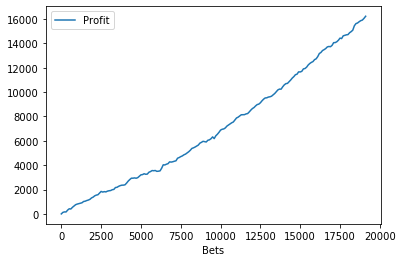

In [143]:
betting_at_same_stake(initial_bankroll=100, stake=5)

In [219]:
"""
This method calculates the mean bookmaker margin for each of the bets in the dataframe.
If parameter max_odds = True, the maximum odds are considered. Otherwise, the margin is calculated on the average odds.
"""
def bookmaker_margin(max_odds=True):
    total_margin = 0
    for ix, row in betting_df.iterrows():
        
        if max_odds: 
            odds_p0 = row['Pl0 Max odds']
            odds_p1 = row['Pl1 Max odds']
            if pd.isna(odds_p0) or pd.isna(odds_p1): continue
        else:
            odds_p0 = row['Pl0 Avg odds']
            odds_p1 = row['Pl1 Avg odds'] 
            
        total_margin += (1/odds_p0) + (1/odds_p1)
    
    return total_margin / betting_df.shape[0]

In [220]:
mean_book_margin_at_max_odds = bookmaker_margin(max_odds = True)
mean_book_margin_at_avg_odds = bookmaker_margin(max_odds = False)

In [221]:
mean_book_margin_at_max_odds

0.9970693346971322

In [222]:
mean_book_margin_at_avg_odds

1.0593734436066509

In [118]:
def kelly(prob, odds):
    return round((prob*odds - 1)/(odds - 1), 2)

In [119]:
def betting_with_kelly(initial_bankroll, max_stake_for_bet=100):
    plot_df_list = []
    
    bankroll = initial_bankroll
    investment = 0
    won_bets = 0
    lost_bets = 0
    total_bets = 0
    
    for ix, row in betting_df.iterrows():
        if bankroll < 0: break
        
        value_on_p0 = row['Bet on Pl0 Value']
        value_on_p1 = row['Bet on Pl1 Value']
        winner = row["Winner"]
        
        if ix % 100 == 0: plot_df_list.append({"Bets":ix,"Profit":bankroll-initial_bankroll})
            
        real_odds_p0 = row['Pl0 Avg odds']
        real_odds_p1 = row['Pl1 Avg odds'] 
        
        if pd.isna(real_odds_p0) or pd.isna(real_odds_p1): continue
            
        if value_on_p0 > 0:
            stake = min(max_stake_for_bet, round(bankroll * kelly(row['Pl0 %'], real_odds_p0)))
            if stake < 0: continue
            investment += stake
            total_bets += 1
            if winner == 0:
                bankroll += (real_odds_p0 - 1) * stake
                won_bets += 1
            else:
                bankroll -= stake
                lost_bets += 1
        
        if value_on_p1 > 0:
            stake = min(max_stake_for_bet, round(bankroll * kelly(row['Pl1 %'], real_odds_p1)))
            if stake < 0: continue
            investment += stake
            total_bets += 1
            if winner == 1:
                bankroll += (real_odds_p1 - 1) * stake
                won_bets += 1
            else:
                bankroll -= stake
                lost_bets += 1
        
    plot_df_list.append({"Bets":ix,"Profit":bankroll-initial_bankroll})
    profit = round(bankroll - initial_bankroll,2)
    roi = round(100 * profit / investment, 2)
    print("Total bets placed: {}\nBets won: {}, bets lost: {}\nProfit: {}\nMoney invested: {}\nROI: {}%"
           .format(total_bets, won_bets, lost_bets, profit, investment, roi))
    plot_df = pd.DataFrame(plot_df_list)
    plot_df.plot.line(x='Bets', y='Profit')

Total bets placed: 19110
Bets won: 11073, bets lost: 8037
Profit: 322555.67
Money invested: 1875374
ROI: 17.2%


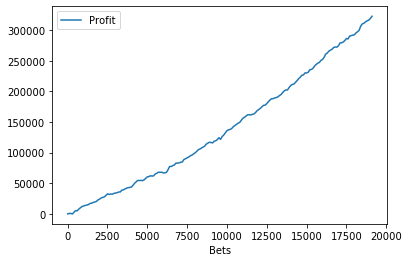

In [120]:
betting_with_kelly(100)

In [150]:
def betting_with_kelly_and_threshold(initial_bankroll, VALUE_THRESHOLD, max_stake_for_bet=100):    
    bankroll = initial_bankroll
    investment = 0
    won_bets = 0
    lost_bets = 0
    total_bets = 0
    
    for ix, row in betting_df.iterrows():
        if bankroll < 0: break
        
        value_on_p0 = row['Bet on Pl0 Value']
        value_on_p1 = row['Bet on Pl1 Value']
        winner = row["Winner"]
                    
        real_odds_p0 = row['Pl0 Avg odds']
        real_odds_p1 = row['Pl1 Avg odds'] 
        
        if pd.isna(real_odds_p0) or pd.isna(real_odds_p1): continue
            
        if value_on_p0 > VALUE_THRESHOLD:
            stake = min(max_stake_for_bet, round(bankroll * kelly(row['Pl0 %'], real_odds_p0)))
            if stake < 0: continue
            investment += stake
            total_bets += 1
            if winner == 0:
                bankroll += (real_odds_p0 - 1) * stake
                won_bets += 1
            else:
                bankroll -= stake
                lost_bets += 1
        
        if value_on_p1 > VALUE_THRESHOLD:
            stake = min(max_stake_for_bet, round(bankroll * kelly(row['Pl1 %'], real_odds_p1)))
            if stake < 0: continue
            investment += stake
            total_bets += 1
            if winner == 1:
                bankroll += (real_odds_p1 - 1) * stake
                won_bets += 1
            else:
                bankroll -= stake
                lost_bets += 1
        
    profit = round(bankroll - initial_bankroll,2)
    roi = round(100 * profit / investment, 2)
    return roi

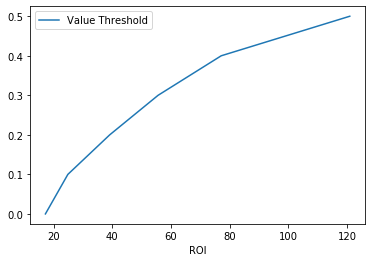

In [123]:
import numpy as np

threshold_comparator_df_list = []
for i in np.linspace(start=0, stop=0.6, num=6, endpoint=False):
    value_threshold = round(i,1)
    roi = betting_with_kelly_and_threshold(100, VALUE_THRESHOLD=value_threshold)
    threshold_comparator_df_list.append({"Value Threshold":value_threshold, "ROI":roi})

threshold_comparator_df = pd.DataFrame(threshold_comparator_df_list)
threshold_comparator_df.plot.line(x='ROI', y='Value Threshold')

# 7. Betting analysis

In [144]:
betting_df = pd.read_csv("csv/Betting_Data.csv")

In [159]:
betting_df.columns

Index(['Date', 'Player 0', 'Player 1', 'Winner', 'Pl0_Rank', 'Pl1_Rank',
       'Pl0 Avg odds', 'Pl1 Avg odds', 'Pl1 Max odds', 'Pl0 Max odds',
       'PS_Pl0', 'PS_Pl1', 'B365_Pl0', 'B365_Pl1', 'Indoor', 'Outdoor',
       'Carpet', 'Clay', 'Grass', 'Greenset', 'Hard', 'International',
       'Premier', 'Grand Slam', 'Tour Championships', '1st Round', '2nd Round',
       '3rd Round', '4th Round', 'Quarterfinals', 'Round Robin', 'Semifinals',
       'Third Place', 'The Final', 'Rank Index', 'Pl0 Recent Form', 'Pl0 Form',
       'Pl1 Recent Form', 'Pl1 Form', 'Pl0 Perf. vs Similar Opponent',
       'Pl1 Perf. vs Similar Opponent', 'Pl0 Surface Performance',
       'Pl1 Surface Performance', 'Pl0 %', 'Pl1 %', 'Fair odds for Pl0',
       'Fair odds for Pl1', 'Bet on Pl0 Value', 'Bet on Pl1 Value'],
      dtype='object')

In [145]:
betting_df['Date'] = pd.to_datetime(betting_df['Date'])

In [146]:
def create_betting_history(betting_df, initial_bankroll, stake, value_threshold=0):
    
    history_df = betting_df[(betting_df["Bet on Pl0 Value"]>value_threshold) | (betting_df["Bet on Pl1 Value"]>value_threshold)].copy()
    
    bankroll = initial_bankroll
    won_bets = 0
    lost_bets = 0
    total_bets = 0
    for ix, row in betting_df.iterrows():
        if bankroll < 0: break
        
        value_on_p0 = row['Bet on Pl0 Value']
        value_on_p1 = row['Bet on Pl1 Value']
        winner = row["Winner"]
                    
        real_odds_p0 = row['Pl0 Avg odds']
        real_odds_p1 = row['Pl1 Avg odds'] 
        
        if pd.isna(real_odds_p0) or pd.isna(real_odds_p1): continue
        
        if value_on_p0 > value_threshold:
            history_df.loc[total_bets, 'Bet on Player:'] = 0
            history_df.loc[total_bets, 'Stake'] = stake
            history_df.loc[total_bets, 'Odds'] = real_odds_p0
            if winner == 0:
                bankroll += (real_odds_p0 - 1) * stake
                won_bets += 1
                history_df.loc[total_bets, 'Won'] = "YES"
                history_df.loc[total_bets, 'Profit'] = (real_odds_p0 - 1) * stake
            else:
                bankroll -= stake
                lost_bets += 1
                history_df.loc[total_bets, 'Won'] = "NO"
                history_df.loc[total_bets, 'Profit'] = stake * -1
            total_bets += 1
        
        if value_on_p1 > value_threshold:
            history_df.loc[total_bets, 'Bet on Player:'] = 1
            history_df.loc[total_bets, 'Stake'] = stake
            history_df.loc[total_bets, 'Odds'] = real_odds_p1
            if winner == 1:
                bankroll += (real_odds_p1 - 1) * stake
                won_bets += 1
                history_df.loc[total_bets, 'Won'] = "YES"
                history_df.loc[total_bets, 'Profit'] = (real_odds_p1 - 1) * stake
            else:
                bankroll -= stake
                lost_bets += 1
                history_df.loc[total_bets, 'Won'] = "NO"
                history_df.loc[total_bets, 'Profit'] = stake * -1
            total_bets += 1
    
    profit = round(bankroll - initial_bankroll,2)
    investment = total_bets*stake
    roi = round(100 * profit / investment, 2)
    print("Total bets placed: {}\nBets won: {}, bets lost: {}\nProfit: {}\nMoney invested: {}\nROI: {}%"
           .format(total_bets, won_bets, lost_bets, profit, investment, roi))
    
    return (history_df, roi)

In [147]:
def bets_for_year(df, year, year_end=None):
    if year_end is not None:
        return df[(df['Date'] > pd.Timestamp(year-1,12,31)) & ((df['Date'] < pd.Timestamp(year_end,12,31)))].copy()
    else: return df[(df['Date'] > pd.Timestamp(year-1,12,31)) & ((df['Date'] < pd.Timestamp(year,12,31)))].copy()

+++++++++
Year 2010
Total bets placed: 1216
Bets won: 705, bets lost: 511
Profit: 174.83
Money invested: 1216
ROI: 14.38%
+++++++++
+++++++++
Year 2011
Total bets placed: 1921
Bets won: 1060, bets lost: 861
Profit: 222.95
Money invested: 1921
ROI: 11.61%
+++++++++
+++++++++
Year 2012
Total bets placed: 1894
Bets won: 1013, bets lost: 881
Profit: 236.49
Money invested: 1894
ROI: 12.49%
+++++++++
+++++++++
Year 2013
Total bets placed: 1942
Bets won: 1037, bets lost: 905
Profit: 201.69
Money invested: 1942
ROI: 10.39%
+++++++++
+++++++++
Year 2014
Total bets placed: 1894
Bets won: 1078, bets lost: 816
Profit: 347.32
Money invested: 1894
ROI: 18.34%
+++++++++
+++++++++
Year 2015
Total bets placed: 2011
Bets won: 1161, bets lost: 850
Profit: 353.2
Money invested: 2011
ROI: 17.56%
+++++++++
+++++++++
Year 2016
Total bets placed: 1995
Bets won: 1177, bets lost: 818
Profit: 356.41
Money invested: 1995
ROI: 17.87%
+++++++++
+++++++++
Year 2017
Total bets placed: 2029
Bets won: 1244, bets lost: 

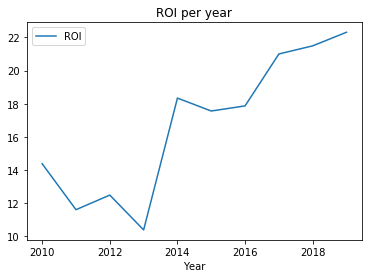

In [151]:
years_result_df_list = []
for y in range(2010,2020):
    print("+++++++++")
    print("Year {}".format(y))
    result = create_betting_history(bets_for_year(betting_df,y), 1000, 1)
    years_result_df_list.append({"Year":y, "ROI": result[1]})
    print("+++++++++")
result_df = pd.DataFrame(years_result_df_list)
result_df.plot.line(x='Year', y='ROI', title="ROI per year")

In [152]:
result = create_betting_history(bets_for_year(betting_df,2010,2019), 1000, 1)
df_2010_2019 = result[0] 
roi_2010_2019 = result[1]

Total bets placed: 19109
Bets won: 11072, bets lost: 8037
Profit: 3245.15
Money invested: 19109
ROI: 16.98%


## ROI by Surface

Since no matches have been played on carpet in surface in these last years, we'll now represents only Hard, Clay and Grass surfaces

In [154]:
df_hard = df_2010_2019[df_2010_2019['Hard'] == 1].copy()
roi_hard = round(100*df_hard['Profit'].sum()/df_hard.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_hard,df_hard.shape[0]))

ROI: 15.31%, Matches: 11495


In [155]:
df_clay = df_2010_2019[df_2010_2019['Clay'] == 1].copy()
roi_clay = round(100*df_clay['Profit'].sum()/df_clay.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_clay,df_clay.shape[0]))

ROI: 17.27%, Matches: 5404


In [156]:
df_grass = df_2010_2019[df_2010_2019['Grass'] == 1].copy()
roi_grass = round(100*df_grass['Profit'].sum()/df_grass.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_grass,df_grass.shape[0]))

ROI: 25.03%, Matches: 2210


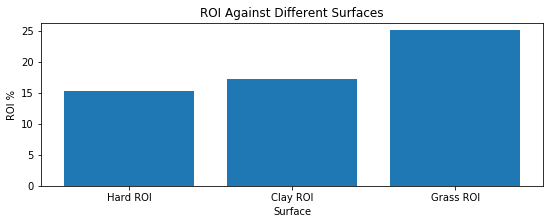

In [157]:
names = ['Hard ROI','Clay ROI','Grass ROI']
values = [roi_hard, roi_clay, roi_grass]

plt.figure(figsize=(9, 3))

plt.bar(names, values)
plt.xlabel("Surface")
plt.ylabel("ROI %")
plt.title("ROI Against Different Surfaces")
plt.show()

## ROI by Tournament

Next, we'll explore which categories provide us with the highest margin

In [160]:
df_atp250 = df_2010_2019[df_2010_2019['International'] == 1].copy()
roi_atp250 = round(100*df_atp250['Profit'].sum()/df_atp250.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_atp250,df_atp250.shape[0]))

ROI: 20.88%, Matches: 7971


In [161]:
df_atp500 = df_2010_2019[df_2010_2019['Premier'] == 1].copy()
roi_atp500 = round(100*df_atp500['Profit'].sum()/df_atp500.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_atp500,df_atp500.shape[0]))

ROI: 13.95%, Matches: 7017


In [162]:
df_atp1000 = df_2010_2019[df_2010_2019['Tour Championships'] == 1].copy()
roi_atp1000 = round(100*df_atp1000['Profit'].sum()/df_atp1000.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_atp1000,df_atp1000.shape[0]))


ROI: 7.31%, Matches: 181


In [163]:
df_slam = df_2010_2019[df_2010_2019['Grand Slam'] == 1].copy()
roi_slam = round(100*df_slam['Profit'].sum()/df_slam.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_slam,df_slam.shape[0]))

ROI: 14.97%, Matches: 3940


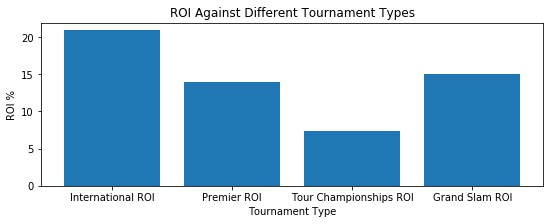

In [165]:
names = ['International ROI','Premier ROI','Tour Championships ROI', 'Grand Slam ROI']
values = [roi_atp250, roi_atp500, roi_atp1000, roi_slam]

plt.figure(figsize=(9, 3))

plt.bar(names, values)
plt.xlabel("Tournament Type")
plt.ylabel("ROI %")
plt.title("ROI Against Different Tournament Types")
plt.show()

## ROI by Round of Tournament

Next, we'll explore which round in a tournament provide us with the highest margin

In [166]:
df_rr = df_2010_2019[df_2010_2019['Round Robin'] == 1].copy()
roi_rr = round(100*df_rr['Profit'].sum()/df_rr.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_rr,df_rr.shape[0]))

ROI: 10.5%, Matches: 175


In [167]:
df_1st_round = df_2010_2019[df_2010_2019['1st Round'] == 1].copy()
roi_1st_round = round(100*df_1st_round['Profit'].sum()/df_1st_round.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_1st_round,df_1st_round.shape[0]))

ROI: 18.57%, Matches: 9189


In [168]:
df_2nd_round = df_2010_2019[df_2010_2019['2nd Round'] == 1].copy()
roi_2nd_round = round(100*df_2nd_round['Profit'].sum()/df_2nd_round.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_2nd_round,df_2nd_round.shape[0]))

ROI: 14.04%, Matches: 5053


In [169]:
df_3rd_round = df_2010_2019[df_2010_2019['3rd Round'] == 1].copy()
roi_3rd_round = round(100*df_3rd_round['Profit'].sum()/df_3rd_round.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_3rd_round,df_3rd_round.shape[0]))

ROI: 14.06%, Matches: 1267


In [170]:
df_4th_round = df_2010_2019[df_2010_2019['4th Round'] == 1].copy()
roi_4th_round = round(100*df_4th_round['Profit'].sum()/df_4th_round.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_4th_round,df_4th_round.shape[0]))

ROI: 21.28%, Matches: 368


In [171]:
df_qf = df_2010_2019[df_2010_2019['Quarterfinals'] == 1].copy()
roi_qf = round(100*df_qf['Profit'].sum()/df_qf.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_qf,df_qf.shape[0]))

ROI: 18.16%, Matches: 1731


In [172]:
df_sm = df_2010_2019[df_2010_2019['Semifinals'] == 1].copy()
roi_sf = round(100*df_sm['Profit'].sum()/df_sm.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_sf,df_sm.shape[0]))

ROI: 12.1%, Matches: 881


In [173]:
df_tp = df_2010_2019[df_2010_2019['Third Place'] == 1].copy()
roi_tp = round(100*df_tp['Profit'].sum()/df_tp.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_tp,df_tp.shape[0]))

ROI: 70.0%, Matches: 1


In [174]:
df_final = df_2010_2019[df_2010_2019['The Final'] == 1].copy()
roi_final = round(100*df_final['Profit'].sum()/df_final.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_final,df_final.shape[0]))

ROI: 30.12%, Matches: 444


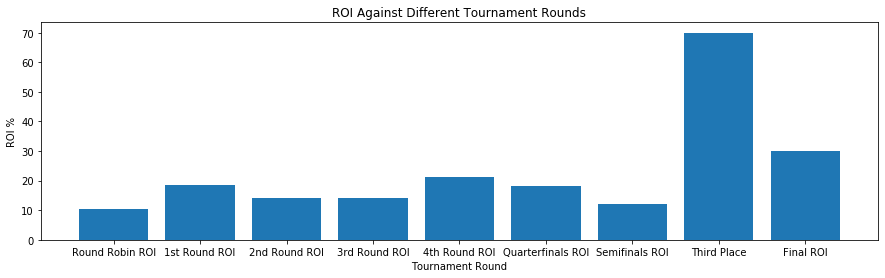

In [175]:
names = ['Round Robin ROI','1st Round ROI','2nd Round ROI', '3rd Round ROI', '4th Round ROI', 'Quarterfinals ROI', 'Semifinals ROI', 'Third Place', 'Final ROI']
values = [roi_rr, roi_1st_round, roi_2nd_round, roi_3rd_round, roi_4th_round, roi_qf, roi_sf, roi_tp, roi_final]

plt.figure(figsize=(15, 4))

plt.bar(names, values)
plt.xlabel("Tournament Round")
plt.ylabel("ROI %")
plt.title("ROI Against Different Tournament Rounds")
plt.show()

In [176]:
df_very_high_ri_diff = df_2010_2019[abs(df_2010_2019['Rank Index']) > 0.5].copy()
roi_very_high_ri_diff = round(100*df_very_high_ri_diff['Profit'].sum()/df_very_high_ri_diff.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_very_high_ri_diff,df_very_high_ri_diff.shape[0]))

ROI: 17.45%, Matches: 4699


In [177]:
df_medium_ri_diff = df_2010_2019[(abs(df_2010_2019['Rank Index']) > 0.1) & (abs(df_2010_2019['Rank Index']) <= 0.5)].copy()
roi_medium_ri_diff = round(100*df_medium_ri_diff['Profit'].sum()/df_medium_ri_diff.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_medium_ri_diff,df_medium_ri_diff.shape[0]))

ROI: 17.0%, Matches: 8304


In [178]:
df_low_ri_diff = df_2010_2019[abs(df_2010_2019['Rank Index']) <= 0.1].copy()
roi_low_ri_diff = round(100*df_low_ri_diff['Profit'].sum()/df_low_ri_diff.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_low_ri_diff,df_low_ri_diff.shape[0]))

ROI: 16.61%, Matches: 6106


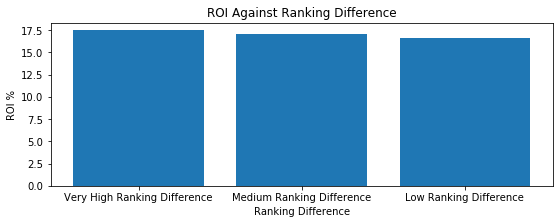

In [179]:
names = ['Very High Ranking Difference','Medium Ranking Difference','Low Ranking Difference']
values = [roi_very_high_ri_diff, roi_medium_ri_diff, roi_low_ri_diff]

plt.figure(figsize=(9, 3))

plt.bar(names, values)
plt.xlabel("Ranking Difference")
plt.ylabel("ROI %")
plt.title("ROI Against Ranking Difference")
plt.show()

## ROI by Absolute Ranking 

Next, we'll analyse how the rankings (Pl0_Rank and Pl1_Rank) affect the ROI

In [180]:
df_top5 = df_2010_2019[(df_2010_2019['Pl0_Rank'] <= 5) & (df_2010_2019['Pl1_Rank'] <= 5)].copy()
roi_top5 = round(100*df_top5['Profit'].sum()/df_top5.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_top5,df_top5.shape[0]))

ROI: 8.04%, Matches: 94


In [181]:
df_top10 = df_2010_2019[(df_2010_2019['Pl0_Rank'] <= 10) & (df_2010_2019['Pl1_Rank'] <= 10)].copy()
roi_top10 = round(100*df_top10['Profit'].sum()/df_top10.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_top10,df_top10.shape[0]))

ROI: 3.15%, Matches: 406


In [182]:
df_others = df_2010_2019[(df_2010_2019['Pl0_Rank'] > 25) & (df_2010_2019['Pl1_Rank'] > 25)].copy()
roi_others = round(100*df_others['Profit'].sum()/df_others.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_others,df_others.shape[0]))

ROI: 19.11%, Matches: 11121


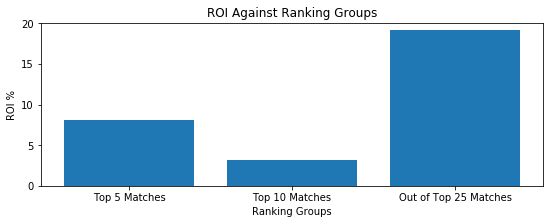

In [183]:
names = ['Top 5 Matches','Top 10 Matches','Out of Top 25 Matches']
values = [roi_top5, roi_top10, roi_others]

plt.figure(figsize=(9, 3))

plt.bar(names, values)
plt.xlabel("Ranking Groups")
plt.ylabel("ROI %")
plt.title("ROI Against Ranking Groups")
plt.show()

In [185]:
df_top = df_2010_2019[
    (df_2010_2019['The Final']+df_2010_2019['Semifinals']==1) 
    & (df_2010_2019['Grand Slam']+df_2010_2019['Tour Championships']+df_2010_2019['Premier']==1)
].copy()
roi_top = round(100*df_top['Profit'].sum()/df_top.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_top,df_top.shape[0]))

ROI: 19.44%, Matches: 577


In [187]:
df_not_top = df_2010_2019[
    (df_2010_2019['The Final']+df_2010_2019['Semifinals']==0) 
    & (df_2010_2019['Grand Slam']+df_2010_2019['Tour Championships']+df_2010_2019['Premier']==0)
].copy()
roi_not_top = round(100*df_not_top['Profit'].sum()/df_not_top.shape[0],2)
print("ROI: {}%, Matches: {}".format(roi_not_top,df_not_top.shape[0]))

ROI: 21.27%, Matches: 7223
